In [10]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [11]:
import numpy as np
import pandas as pd

In [12]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [13]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [14]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [15]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [16]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [17]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [18]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_12_months = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_12_months)

('2017-08-23',)


In [20]:
# Calculate the date 1 year ago from today
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(one_year_ago)

2016-08-23


In [21]:
# Perform a query to retrieve the data and precipitation scores
precip_analysis = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-23").filter(Measurement.date <="2017-08-23").all()

In [22]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
df = pd.DataFrame(precip_analysis)
df['date'] = pd.to_datetime(df['date'])
prec_df = df.set_index('date')
prec_df.tail()

,prcp
date,
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56
2017-08-22,0.50
2017-08-23,0.45


<IPython.core.display.Javascript object>


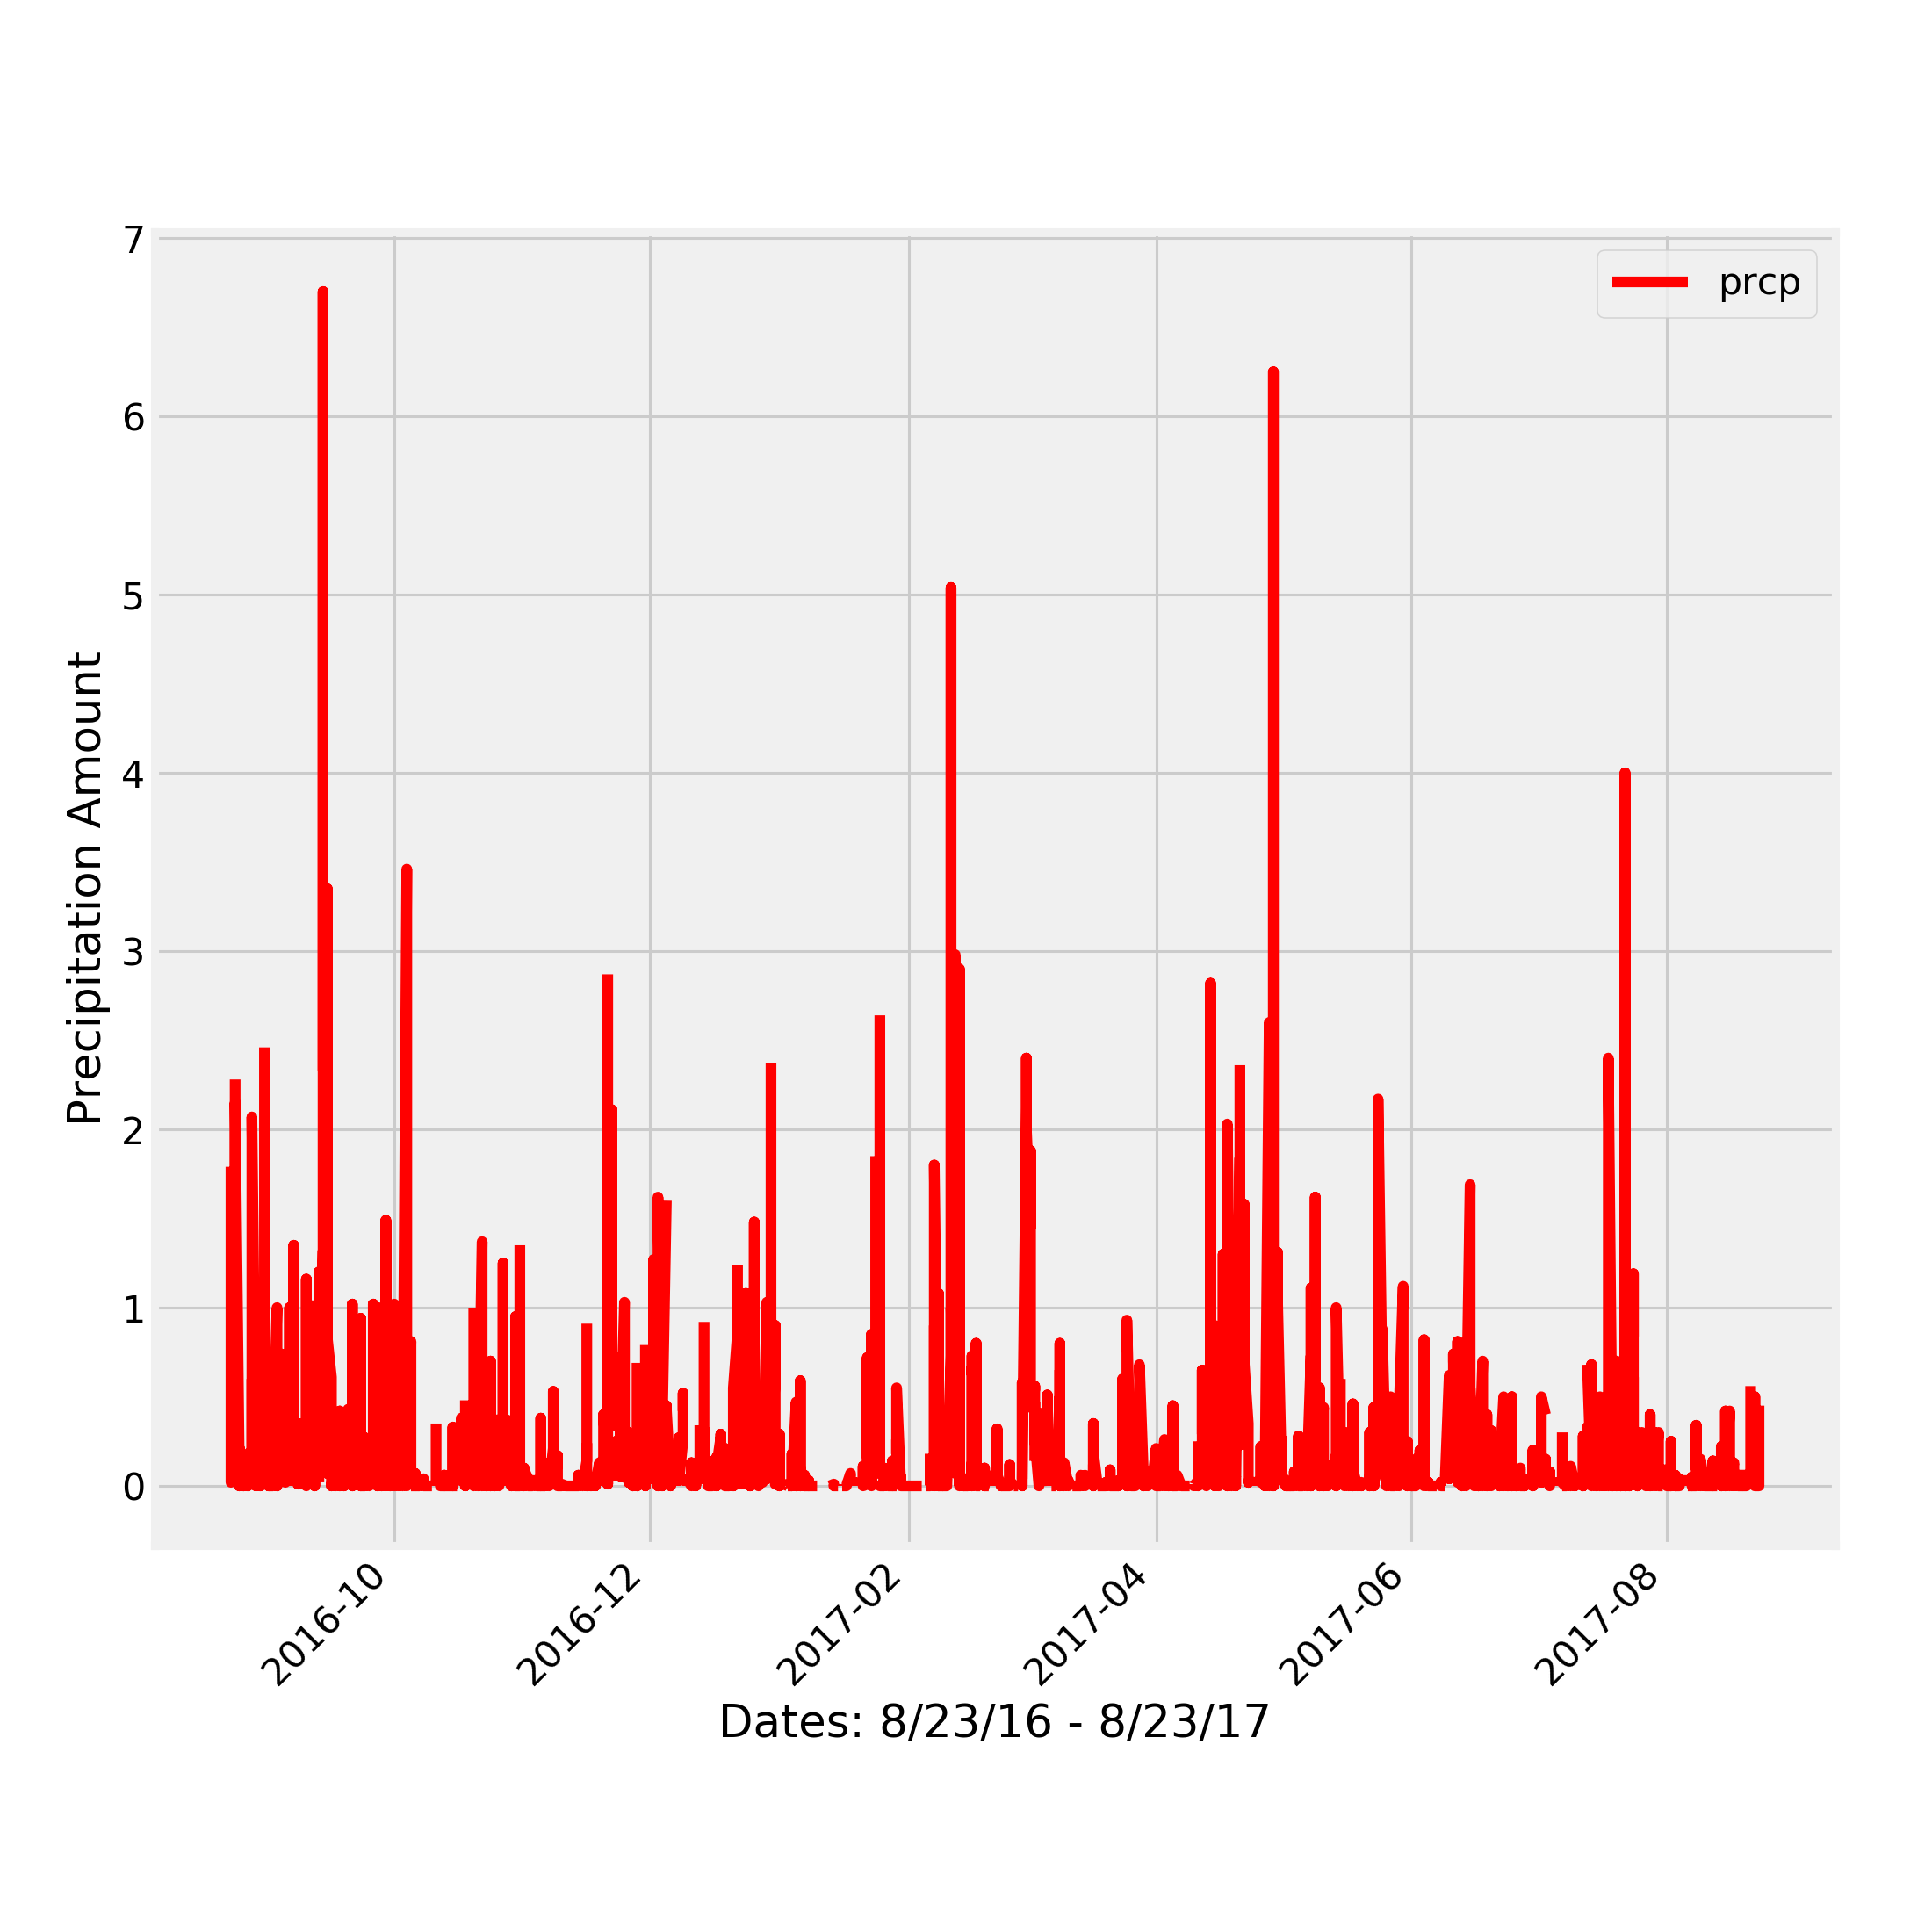

In [35]:
df_plot = prec_df.plot(figsize = (10, 10), sort_columns=True, rot=45, use_index=True, legend=True, grid=True, color='red')
plt.xlabel("Dates: 8/23/16 - 8/23/17")
plt.ylabel("Precipitation Amount")
plt.savefig('Exports/precipitation_analysis.png')
plt.show()

In [24]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [25]:
# How many stations are available in this dataset?
station_number = session.query(Measurement).group_by(Measurement.station).count()
print(f'There are {station_number} available.')

There are 9 available.


In [26]:
#Confirm with Pandas
csv = 'Resources/hawaii_stations.csv'
df = pd.read_csv(csv)
df.count()

station      9
name         9
latitude     9
longitude    9
elevation    9
dtype: int64

In [27]:
# What are the most active stations?
# List the stations and the counts in descending order.
stations = session.query(Measurement.station, func.count(Measurement.id)).group_by(Measurement.station).order_by(func.count(Measurement.id).desc())

for station, count in stations:
    print(station, count)  

USC00519281 2772
USC00519397 2724
USC00513117 2709
USC00519523 2669
USC00516128 2612
USC00514830 2202
USC00511918 1979
USC00517948 1372
USC00518838 511


In [28]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
temp = session.query(func.avg(Measurement.tobs).label('avg_temp'),
                func.min(Measurement.tobs).label('min_temp'),
                func.max(Measurement.tobs).label('max_temp')).filter(Measurement.station == station)

temp_list = {}
temp_list['data'] = []

for row in temp:
    temp_list['data'].append(
    {"Avg Temp": row.avg_temp,
    "Min Temp": row.min_temp,
    "Max Temp": row.max_temp})

temp_list['data']

[{'Avg Temp': 72.72407045009784, 'Max Temp': 83.0, 'Min Temp': 58.0}]

In [29]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_obsv = session.query(Measurement.station, Measurement.date, Measurement.tobs).filter(Measurement.station == 'USC00519281', Measurement.date > '2016-08-23').all()
temp_obsv_df = pd.DataFrame(temp_obsv)
temp_obsv_df.head()

,station,date,tobs
0,USC00519281,2016-08-24,77.0
1,USC00519281,2016-08-25,80.0
2,USC00519281,2016-08-26,80.0
3,USC00519281,2016-08-27,75.0
4,USC00519281,2016-08-28,73.0


In [30]:
last_year = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date > '2016-08-23').all()
last_year = pd.DataFrame(last_year)
last_year.tail()

,date,tobs
2218,2017-08-19,71.0
2219,2017-08-20,78.0
2220,2017-08-21,76.0
2221,2017-08-22,76.0
2222,2017-08-23,76.0


<IPython.core.display.Javascript object>


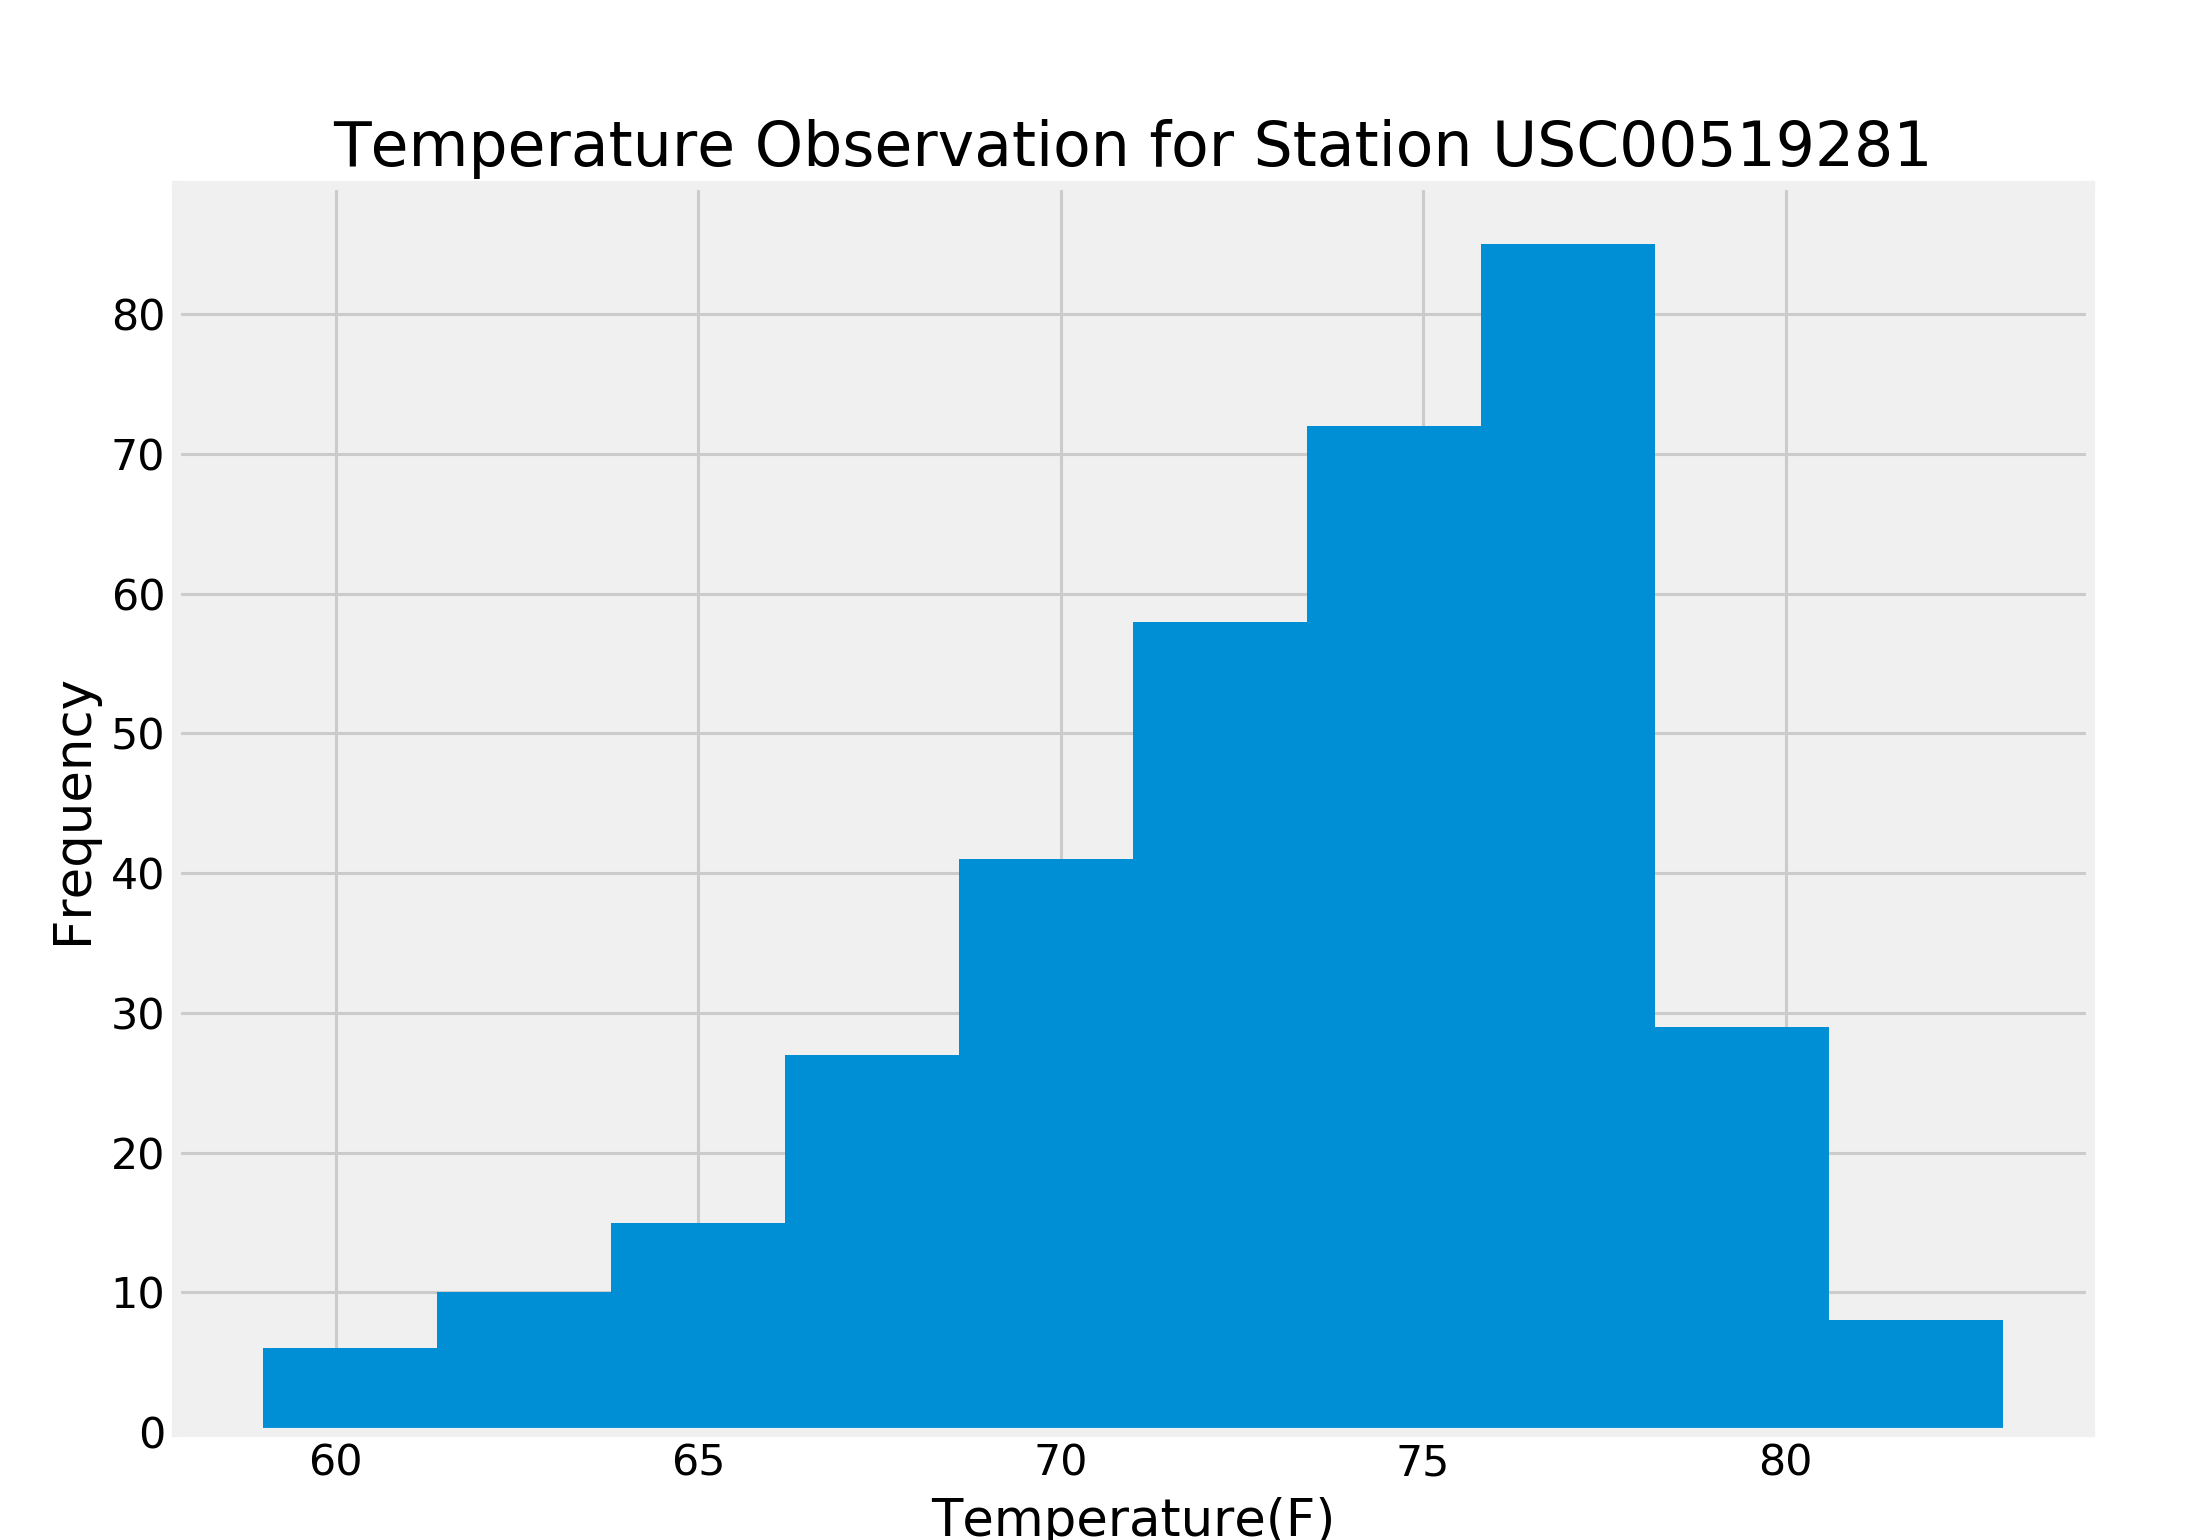

In [31]:
plt.figure(figsize=(10,7))
plt.hist(temp_obsv_df['tobs'])
plt.title('Temperature Observation for Station USC00519281')
plt.xlabel('Temperature(F)')
plt.ylabel('Frequency')
plt.savefig('Exports/temperature_observations.png')
plt.show()

In [32]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates

#Start date ('%Y-%m-%d'):2017-04-08
#End date ('%Y-%m-%d'):2017-04-15
def calc_temps():
    
    start_date = str(input("Start date ('%Y-%m-%d'):"))
    end_date = str(input("End date ('%Y-%m-%d'):"))
    print(f'{start_date}, {end_date}')
    
    min_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.date > start_date).filter(Measurement.date < end_date).all()
    max_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.date > start_date).filter(Measurement.date < end_date).all()
    avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.date > start_date).filter(Measurement.date < end_date).all()
    
    print(f'Minimum Temperature:{min_temp}')
    print(f'Maxiumum Temperature:{max_temp}')
    print(f'Average Temperature: {avg_temp}')  
calc_temps() 

Start date ('%Y-%m-%d'):2017-04-08
End date ('%Y-%m-%d'):2017-04-15
2017-04-08, 2017-04-15
Minimum Temperature:[(67.0,)]
Maxiumum Temperature:[(82.0,)]
Average Temperature: [(74.275,)]


In [36]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
#Start date ('%Y-%m-%d'):2016-04-08
#End date ('%Y-%m-%d'):2016-04-15
calc_temps()

Start date ('%Y-%m-%d'):2016-04-08
End date ('%Y-%m-%d'):2016-04-15
2016-04-08, 2016-04-15
Minimum Temperature:[(67.0,)]
Maxiumum Temperature:[(78.0,)]
Average Temperature: [(74.16666666666667,)]


<IPython.core.display.Javascript object>


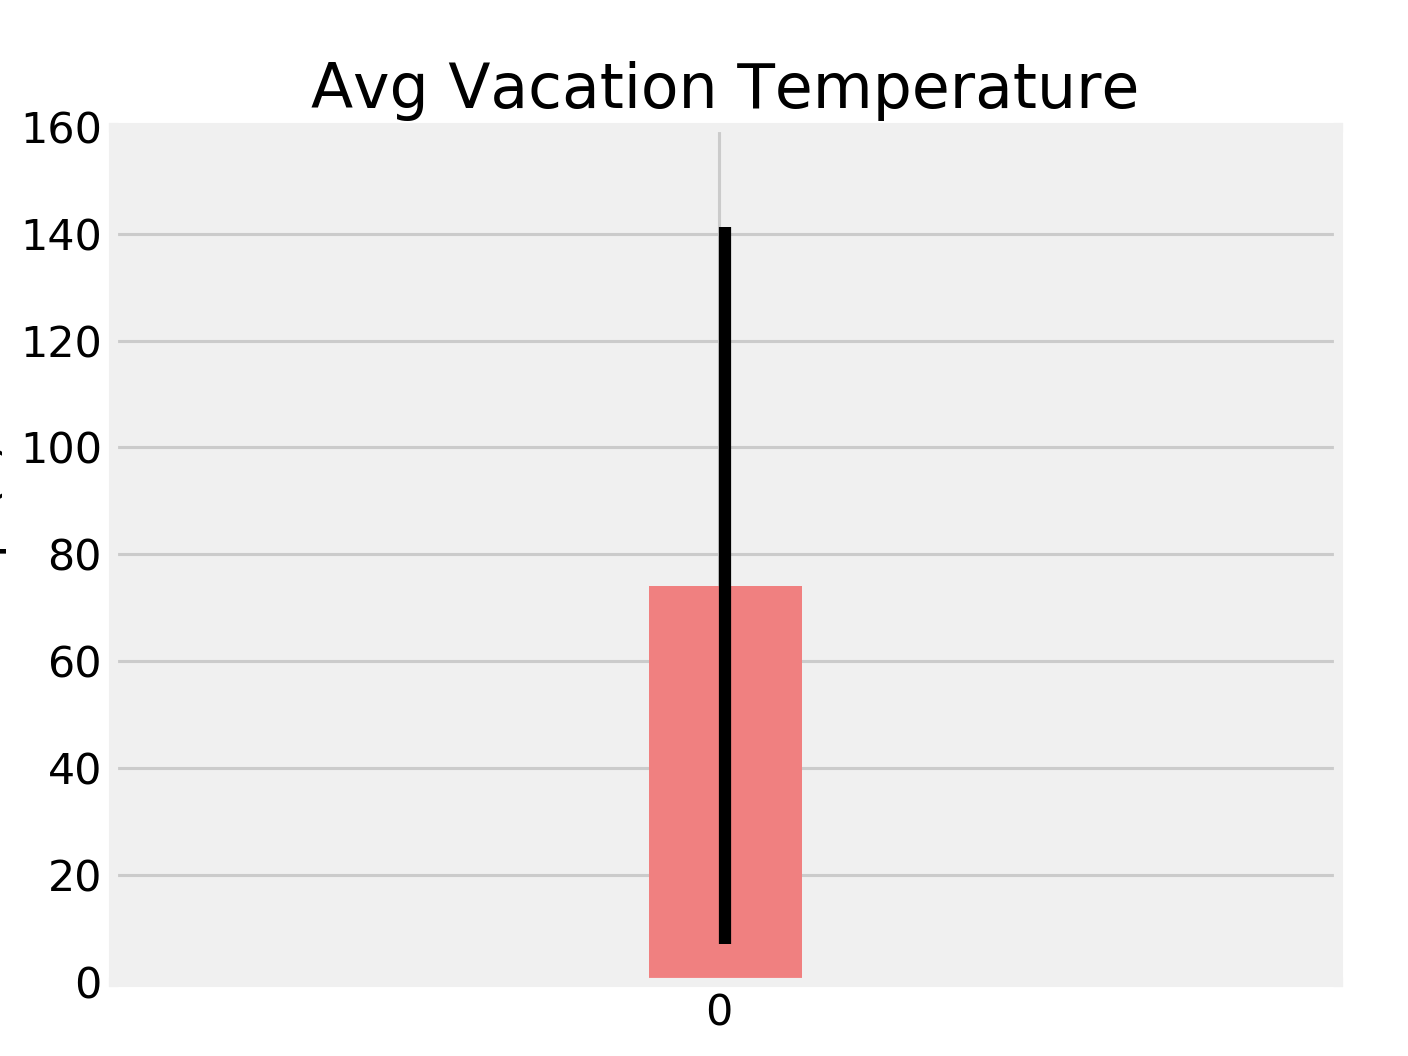

In [37]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
fig, ax = plt.subplots() 
x= np.arange(0,1,1) 
ax.bar(x, 74.167, yerr=[[67,78]], color='lightcoral', width=0.5) 
tick_locations = [value -0.02 for value in x] 
plt.xticks(tick_locations, x) 
ax.set_xlim(-2, 2) 
ax.set_ylim(0,160) 
ax.set_ylabel("Temp (F)") 
ax.set_title("Avg Vacation Temperature") 
plt.savefig('Exports/average_vacation_temperature.png')
plt.show()